In [ ]:
#project 1
#Linear regression single variable
#Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>
#ans-41288.69409442
#excel-canada per cap income

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n


In [9]:
df=pd.read_excel('canada per cap income.xlsx')

In [10]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [17]:
df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [40]:
df=df.rename(columns={"per capita" : "per"})
df.head()

,year,per
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


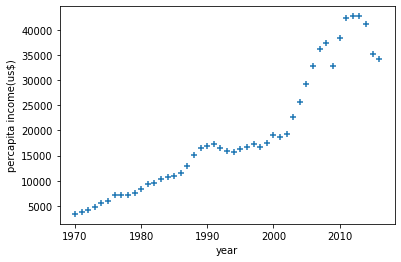

In [43]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('percapita income(us$)')
plt.scatter(df.year,df.per, marker='+' )



In [44]:
reg=linear_model.LinearRegression()
reg.fit(df[['year']],df.per)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
reg.predict(np.array((2000)).reshape(-1, 1))

array([24719.39258996])

In [50]:
reg.coef_

array([828.46507522])

In [51]:
reg.intercept_

-1632210.7578554575

In [52]:
828.46507522*2000+-1632210.7578554575

24719.39258454251

In [55]:
reg.predict(np.array((1970)).reshape(-1, 1))

array([-134.55966672])

In [53]:
reg.predict(np.array((2020)).reshape(-1, 1))

array([41288.69409442])

In [67]:
#project-2 
#linear regression multiple variable
#excel-hiring

#This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary.  I need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

#2 yr experience, 9 test score, 6 interview score

#12 yr experience, 10 test score, 10 interview score

In [65]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [69]:
df=pd.read_excel('hiring.xlsx')
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [77]:
df.experience=df.experience.fillna("zero")

In [78]:
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [125]:
df.experience = df.experience.apply(w2n.word_to_num)


In [117]:
df.test_score.median()

8.0

In [119]:
import math
median_test_score = math.floor(df.test_score.median())
median_test_score

8

In [120]:
median_test_score

8

In [121]:
df.test_score=df.test_score.fillna(median_test_score)

In [126]:
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [130]:
reg=linear_model.LinearRegression()
reg.fit(df[['experience', 'test_score', 'interview_score']], df.salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [133]:
reg.intercept_

17737.26346433771

In [139]:
reg.predict([[2,9,6]])

array([53205.96797671])

In [140]:
reg.predict([[12,10,10]])

array([92002.18340611])

In [143]:
#--(y= m1x1 + m2x2 + m3x3 +b)--
2812.95487627*2+ 1845.70596798*9+2205.24017467*6+17737.26346433771

53205.967976717715